In [2]:
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [3]:
data = pd.read_csv('train_data.csv')
len(data)


28624

In [4]:
x_train = data[['order_freight_value', 'product_description_lenght', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob','customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_train = data['review_score']

In [5]:
regr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0)
regr.fit(x_train,y_train)
regr.feature_importances_

array([4.87582620e-02, 5.09299970e-02, 4.14759289e-02, 8.34511967e-02,
       6.80800969e-01, 5.81848953e-02, 1.28231564e-04, 4.72943994e-04,
       3.24249948e-04, 7.95508705e-05, 2.22667774e-03, 1.13917421e-03,
       1.59519968e-03, 1.47089730e-03, 1.72250760e-03, 7.80872468e-04,
       4.16052419e-03, 9.10575644e-04, 9.40459617e-04, 1.08128866e-03,
       6.20880785e-04, 1.38770738e-03, 2.75288549e-04, 2.13539616e-03,
       3.90326014e-03, 5.24025972e-04, 5.49148551e-04, 1.06735167e-04,
       2.47790894e-03, 2.08895005e-03, 2.81416398e-04, 4.44854830e-03,
       5.66330792e-04])

In [6]:
test_data = pd.read_csv('test_data.csv')
len(test_data)

12268

In [7]:
x_test = test_data[['order_freight_value', 'product_description_lenght', 'delta_days', 'pos_prob', 'neg_prob', 'neu_prob', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO']]
y_test = test_data['review_score']

In [8]:
predictions = (regr.predict(x_test))

In [9]:
test_data['Prediction'] = predictions
test_data.head()

,Unnamed: 0,order_products_value,order_freight_value,product_description_lenght,product_photos_qty,review_score,review_comment_message,delta_days,Classificacao,customer_state_AC,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,pos_prob,neg_prob,neu_prob,Prediction
0,13020,49.00,17.65,348,2,1,demora demais para entrega do produto,23.0,-1,0,...,0,0,0,0,0,0,0.802357,0.152163,0.045480,1.82
1,60824,890.00,116.87,543,1,5,produto recebido no prazo e em perfeitas condi...,19.0,1,0,...,0,1,0,0,0,0,0.999416,0.000187,0.000397,4.72
2,8239,129.00,12.32,617,3,4,houve um pouco de demora mas deu tudo certo ob...,17.0,1,0,...,0,0,0,0,1,0,0.933255,0.000794,0.065951,3.31
3,13247,117.99,9.64,916,1,5,obrigado eu recomendo baratheon,4.0,1,0,...,0,0,0,0,1,0,0.991217,0.006855,0.001928,4.49
4,64389,179.40,53.01,1991,2,5,lindo o papel de parede,14.0,1,0,...,0,0,0,0,0,0,0.970413,0.008010,0.021576,4.48


In [16]:
from sklearn.metrics import r2_score
import numpy as np

In [17]:
r2_score(y_test, predictions)

0.6522874793960838

In [12]:
test_data['Prediction'].hist(bins=5, density=True)

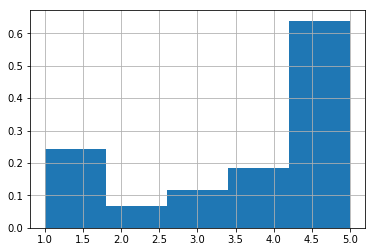

In [13]:
test_data['review_score'].hist(bins=5, density=True)

In [19]:
import matplotlib.pyplot as plt

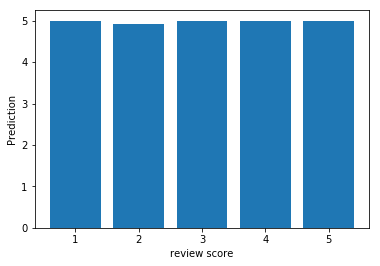

In [31]:
plt.bar(test_data['review_score'], test_data['Prediction'])
plt.xlabel('review score')
plt.ylabel('Prediction')
plt.show()

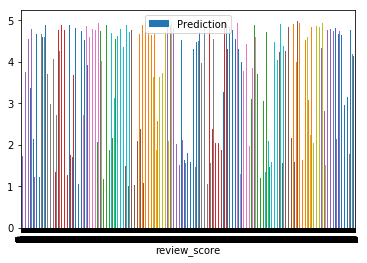

In [32]:
test_data.plot.bar(x='review_score', y='Prediction');

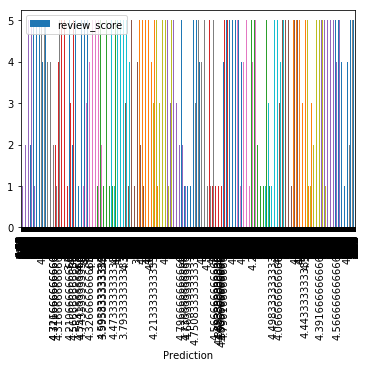

In [33]:
test_data.plot.bar(x='Prediction', y='review_score');

In [ ]:
test_data.plot.barh